In [ ]:
## Install Detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-aa_r1t7x
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-aa_r1t7x
  Resolved https://github.com/facebookresearch/detectron2.git to commit dc9ad7055b48f25ab0a13e817c1a427b1385f98a
  Preparing metadata (setup.py) ... done
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached fvcore-0.1.5.post20221221.tar.gz (50 kB)
  Preparing metadata (setup.py) ... done
  Using cached iopath-0.1.9-py3-none-any.whl (27 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cached hydra_core-1.3.1-py3-none-any.whl (154 kB)
  Using cached black-23.1.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached antlr4-python3-runtime-4.9.3.tar.gz (117 kB)
  Preparing metadata (setup.py) ... done
  Using cac

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [ ]:
#Register the training dataset

from detectron2.data.datasets import register_coco_instances

register_coco_instances("rover", {}, "/content/coco.json", "rover-project")


In [ ]:
#Keypoint detection registration

from detectron2.data import MetadataCatalog

keypoint_names = ["Front wheel-L",
                "Front wheel-R",
                "Front-Chasis-R",
                "Front-Chasis-L",
                "Rear Chasis-L",
                "Rear Chasis-R",
                "Rear Wheel-R",
                "Rear Wheel-L",
                "Cam"]
keypoint_flip_map = []#[('a', 'b'), ('c', 'd'), ('e', 'f'),('g','h'),('i','j')]

from detectron2.data import MetadataCatalog
classes = MetadataCatalog.get("rover").thing_classes = ["rover"]
print(classes)

['rover']


In [ ]:
MetadataCatalog.get("rover").thing_classes = ["rover"]
MetadataCatalog.get("rover").thing_dataset_id_to_contiguous_id = {1:0}
MetadataCatalog.get("rover").keypoint_names = keypoint_names
MetadataCatalog.get("rover").keypoint_flip_map = keypoint_flip_map
MetadataCatalog.get("rover").evaluator_type="coco"

In [ ]:
dataset_dicts = DatasetCatalog.get("rover")
dataset_dicts

[02/05 14:59:52 d2.data.datasets.coco]: Loaded 10 images in COCO format from /content/coco.json


[{'file_name': 'rover-project/0.jpg',
  'height': 667,
  'width': 1000,
  'image_id': '0',
  'annotations': [{'iscrowd': 0,
    'bbox': [422, 273, 894, 566],
    'keypoints': [479.5,
     496.5,
     2,
     819.5,
     525.5,
     2,
     749.5,
     375.5,
     2,
     562.5,
     395.5,
     2,
     587.5,
     393.5,
     2,
     711.5,
     380.5,
     2,
     709.5,
     493.5,
     2,
     590.5,
     492.5,
     2,
     571.5,
     322.5,
     2],
    'category_id': 0,
    'segmentation': [[442,
      511,
      441,
      478,
      470,
      463,
      497,
      459,
      473,
      450,
      487,
      424,
      499,
      427,
      546,
      432,
      538,
      395,
      544,
      379,
      562,
      388,
      555,
      350,
      545,
      336,
      545,
      299,
      598,
      299,
      601,
      335,
      584,
      348,
      588,
      377,
      656,
      365,
      667,
      378,
      657,
      320,
      663,
      296,
      693,
      3

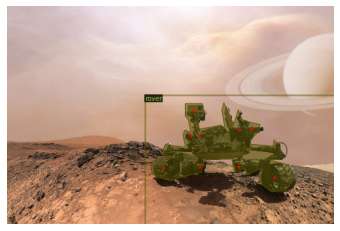

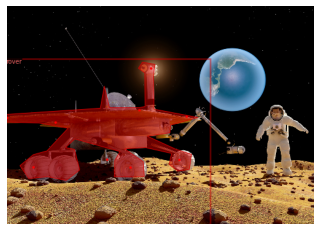

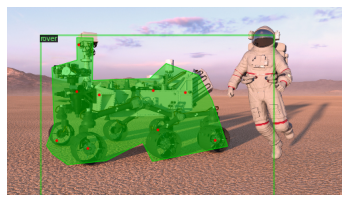

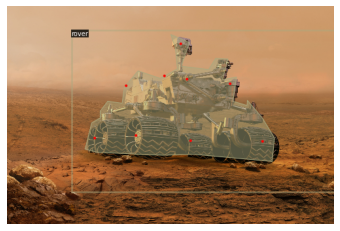

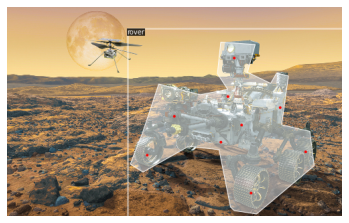

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer

rover_metadata = MetadataCatalog.get("rover")


## Display Annoated data
def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(), plt.imshow(im), plt.axis('off');

for d in random.sample(dataset_dicts, 5):
    img = cv2.imread("/content/" + d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=rover_metadata, scale=0.5)   
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("rover",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")  
cfg.SOLVER.IMS_PER_BATCH = 2  
cfg.SOLVER.BASE_LR = 0.001 
cfg.SOLVER.MAX_ITER = 1500    
cfg.SOLVER.STEPS = []       
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # hand
cfg.MODEL.RETINANET.NUM_CLASSES = 1
cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 9
cfg.TEST.KEYPOINT_OKS_SIGMAS = np.ones((9, 1), dtype=float).tolist()


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[02/05 15:00:16 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_a6e10b.pkl: 237MB [00:04, 55.7MB/s]                           
roi_heads.keypoint_head.score_lowres.{bias, weight}


[02/05 15:00:25 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.8/dist-packages/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)
/usr/local/lib/python3.8/dist-packages/detectron2/structures/keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Trigg

[02/05 15:00:44 d2.utils.events]:  eta: 0:12:36  iter: 19  total_loss: 9.284  loss_cls: 0.7383  loss_box_reg: 0.3418  loss_keypoint: 8.099  loss_rpn_cls: 0.08638  loss_rpn_loc: 0.01694  time: 0.5110  data_time: 0.0244  lr: 1.9981e-05  max_mem: 2935M
[02/05 15:00:55 d2.utils.events]:  eta: 0:12:52  iter: 39  total_loss: 8.825  loss_cls: 0.4082  loss_box_reg: 0.2999  loss_keypoint: 8.076  loss_rpn_cls: 0.05928  loss_rpn_loc: 0.01402  time: 0.5410  data_time: 0.0149  lr: 3.9961e-05  max_mem: 2935M
[02/05 15:01:06 d2.utils.events]:  eta: 0:12:40  iter: 59  total_loss: 8.494  loss_cls: 0.1085  loss_box_reg: 0.267  loss_keypoint: 8.048  loss_rpn_cls: 0.03675  loss_rpn_loc: 0.0102  time: 0.5358  data_time: 0.0103  lr: 5.9941e-05  max_mem: 2935M
[02/05 15:01:16 d2.utils.events]:  eta: 0:12:29  iter: 79  total_loss: 8.385  loss_cls: 0.09452  loss_box_reg: 0.2449  loss_keypoint: 8.007  loss_rpn_cls: 0.02274  loss_rpn_loc: 0.008641  time: 0.5342  data_time: 0.0164  lr: 7.9921e-05  max_mem: 2935M


In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[02/05 15:15:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


True

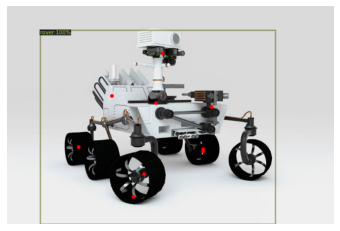

In [37]:
im = cv2.imread("/content/test.jpeg")
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
                metadata=rover_metadata, 
                scale=1, 
                #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])
cv2.imwrite('/content/h.jpg',out.get_image()[:, :, ::-1])